In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
%matplotlib inline

In [3]:
missing_values = ['n/a','na','--','.', 'nan']
df = pd.read_csv(
    filepath_or_buffer='dataset/bcb/selic3.csv',
    sep=";",
    na_values=missing_values)
df['valor'] = pd.to_numeric(df.valor.str.replace(',', '.'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    416 non-null    object 
 1   valor   411 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.6+ KB


<AxesSubplot:>

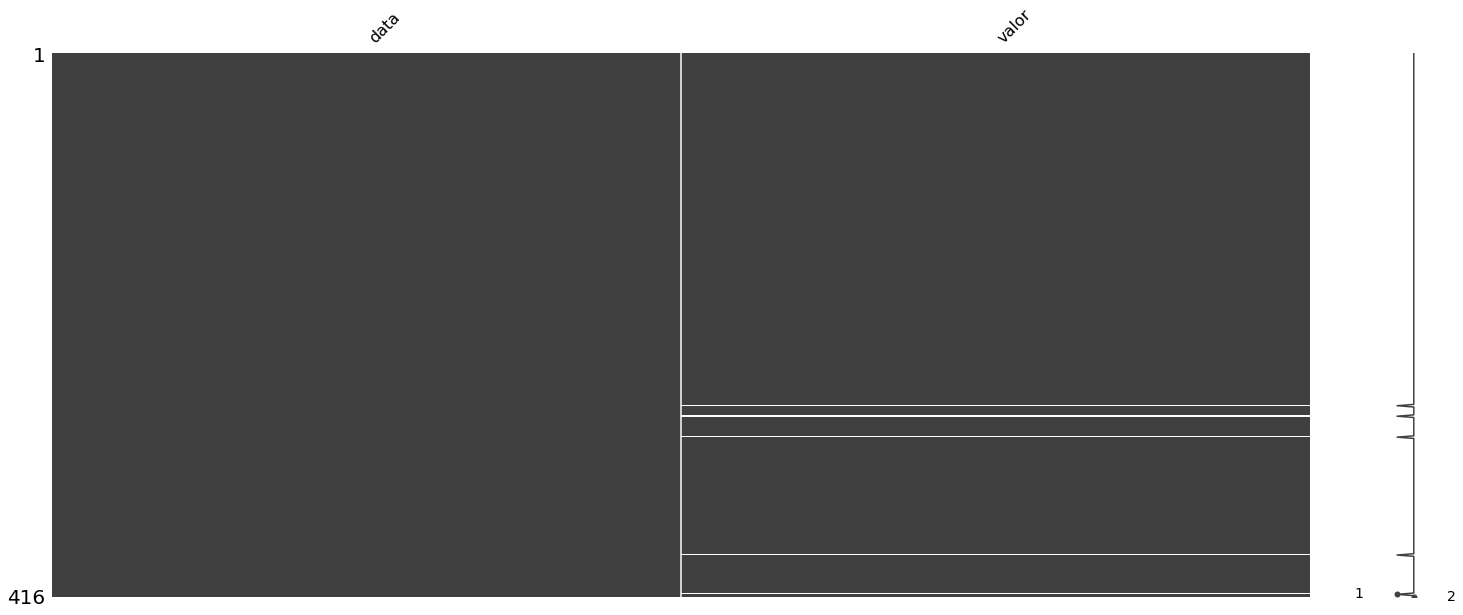

In [5]:
msno.matrix(df)

<AxesSubplot:xlabel='data'>

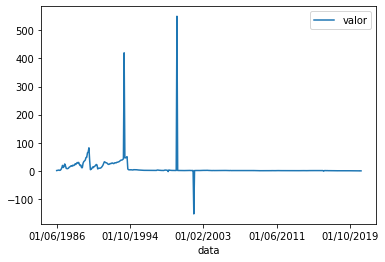

In [8]:
df.plot(x='data', y ='valor')

In [9]:
media_valor = df.valor.mean()
media_valor

8.539659367396593

In [10]:
desvio = df.valor.std()
desvio

36.58467805210768

In [11]:
filtro = df.valor < 0
filtro

0      False
1      False
2      False
3      False
4      False
       ...  
411    False
412    False
413    False
414    False
415    False
Name: valor, Length: 416, dtype: bool

In [12]:
df[filtro]

,data,valor
152,01/02/1999,-2.38
187,01/01/2002,-153.00
364,01/10/2016,-1.05


In [13]:
idx = df.index[filtro].tolist()
idx

[152, 187, 364]

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

In [14]:
df.loc[idx, 'valor'] = np.NaN

In [16]:
media_valor = df.valor.mean()
media_valor

8.985857843137255

In [18]:
desvio = df.valor.std()
desvio

35.82555200772033

In [19]:
df[df.valor < (media_valor - desvio)]

,data,valor


In [20]:
df[df.valor > (media_valor + desvio)]

,data,valor
40,01/10/1989,47.70
41,01/11/1989,48.41
42,01/12/1989,64.21
43,01/01/1990,67.60
44,01/02/1990,82.04
92,01/02/1994,419.90
93,01/03/1994,46.42
94,01/04/1994,46.49
95,01/05/1994,47.95
96,01/06/1994,50.62


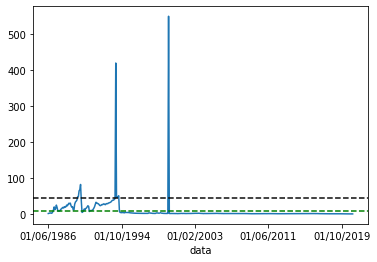

In [23]:
df.plot(legend=False, x='data', y='valor')
plt.axhline(media_valor + desvio, color='#080808', linestyle='--')
plt.axhline(media_valor, color='g', linestyle='--')

In [22]:
possiveis_outlines = df[df.valor > (media_valor + desvio)].index.tolist()

In [17]:
idx = []
for i in possiveis_outlines:
    valor = float(df[df.index==i].valor)
    anterior = float(df[df.index==i-1].valor)
    relacao = valor/anterior
    print(relacao)

    if relacao > 2:
        idx.append(i)

1.2363919129082428
1.0148846960167714
1.3263788473455898
1.0527955147173338
1.2136094674556215
9.819925163704397
0.11055013098356753
1.0015079707022836
1.0314046031404602
1.0556830031282585
376.7123287671233


In [18]:
idx

[92, 164]

In [19]:
df.loc[idx]

,data,valor
92,01/02/1994,419.9
164,01/02/2000,550.0


In [20]:
idx2 = []
for i in possiveis_outlines:
    subidx = list(range(i-3, i+4))
    subdf = df.loc[subidx]
    subdf_media = subdf.valor.mean()
    subdf_desvio = subdf.valor.std()
    if float(df[df.index==i].valor) > (subdf_media+subdf_desvio):
        idx2.append(i)

In [21]:
idx2

[44, 92, 164]

In [22]:
df.loc[idx2]

,data,valor
44,01/02/1990,82.04
92,01/02/1994,419.90
164,01/02/2000,550.00


In [23]:
df.loc[idx, 'valor'] = np.NaN

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    416 non-null    object 
 1   valor   406 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.6+ KB


<AxesSubplot:>

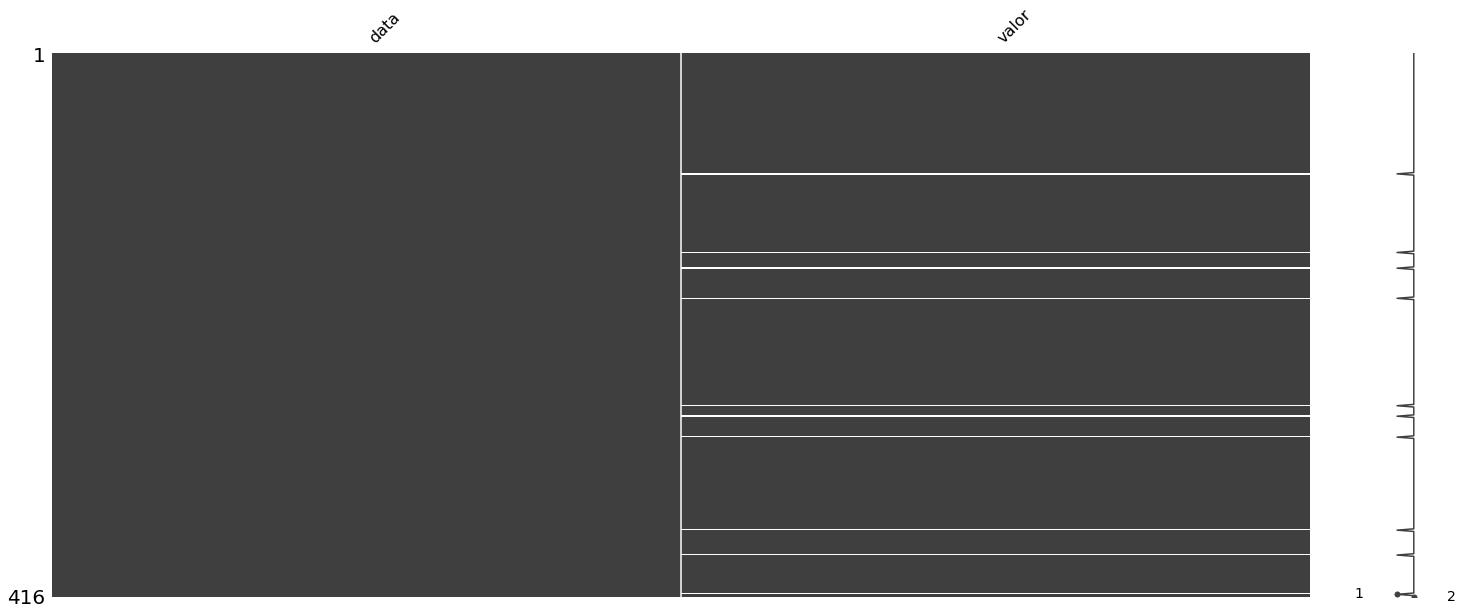

In [25]:
msno.matrix(df)

<AxesSubplot:>

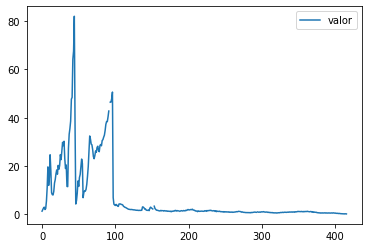

In [26]:
df.plot()

In [27]:
df.interpolate(method='linear', inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    416 non-null    object 
 1   valor   416 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.6+ KB


<AxesSubplot:>

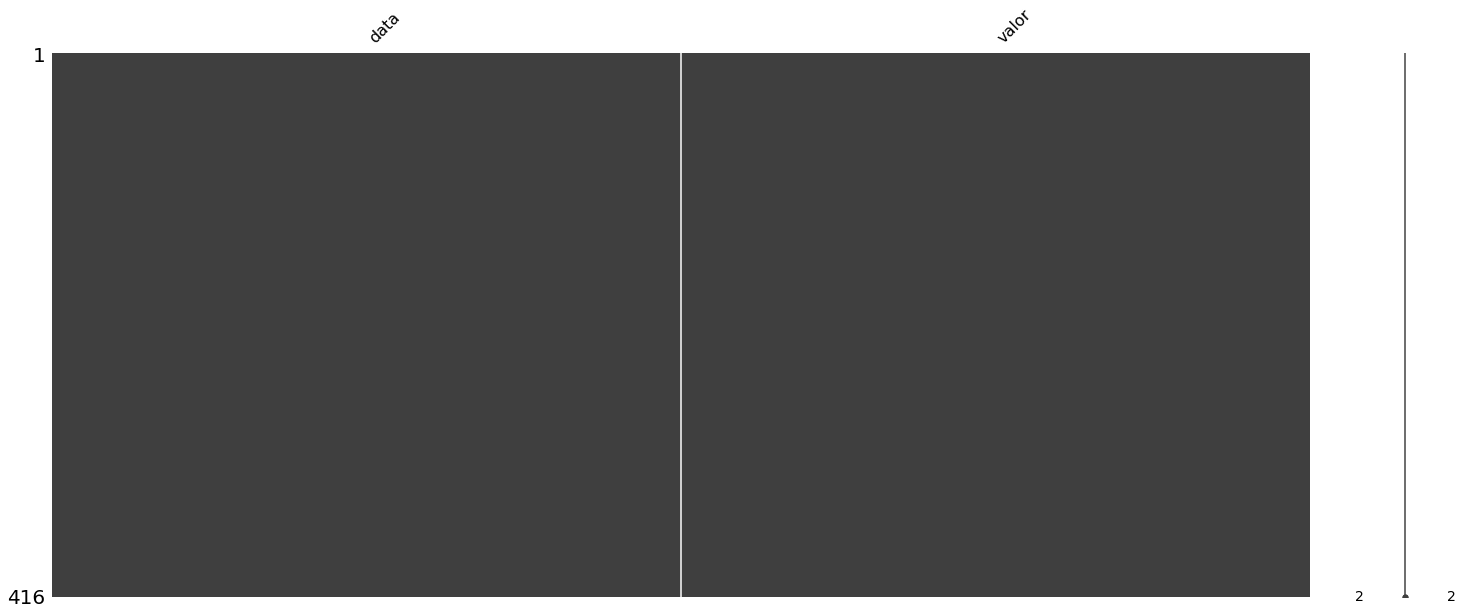

In [29]:
msno.matrix(df)

In [30]:
media_valor = df.valor.mean()
media_valor

6.612860576923078

In [31]:
desvio = df.valor.std()
desvio

12.055364140848926

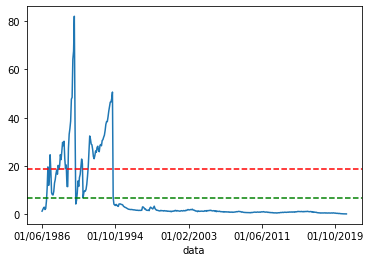

In [32]:
df.plot(legend=False, x='data', y='valor')
plt.axhline(media_valor + desvio, color='r', linestyle='--')
plt.axhline(media_valor, color='g', linestyle='--')